# 911 Calls 

In [9]:
import numpy as np
import pandas as pd

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df = pd.read_csv('911.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [13]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1


In [17]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

# Analyzing the most common Reason for a 911 call based off of the new Column Reason

In [18]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

# Creating a countplot for 911 calls by Reason.

<AxesSubplot:xlabel='Reason', ylabel='count'>

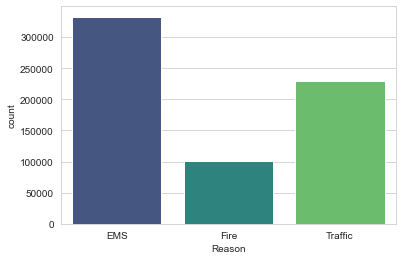

In [19]:
sns.countplot(x='Reason',data=df,palette='viridis')

# Changing the timestamp from str to datetime format to analyze the calls based on timestamp

In [55]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [56]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [23]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [57]:
df['Day of Week'] = df['Day of Week'].map(dmap)

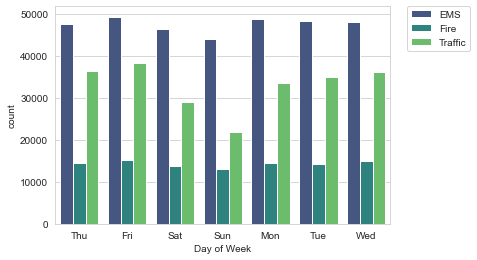

In [58]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

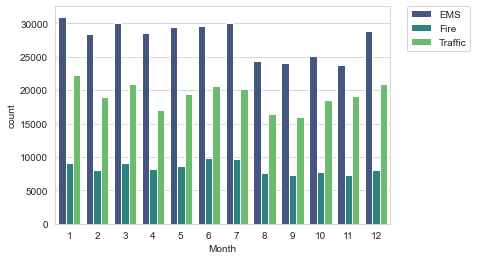

In [59]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Creating a simple plot of the dataframe indicating the count of calls per month

<AxesSubplot:xlabel='Month'>

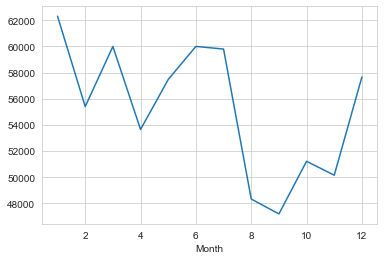

In [60]:

byMonth['twp'].plot()

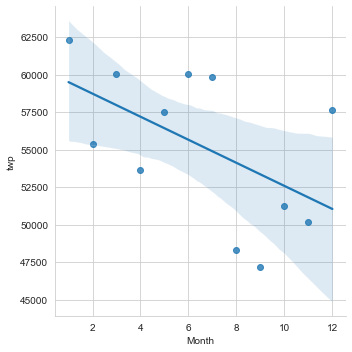

In [61]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [62]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

# Now groupedby the Date column with the count and created a plot of counts of 911 calls.

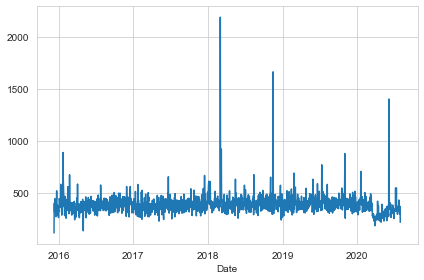

In [64]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

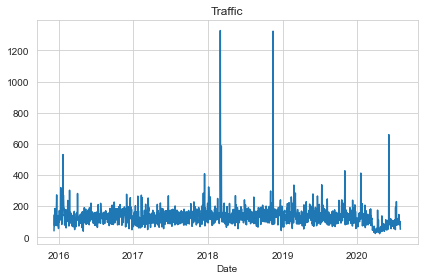

In [65]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

In [66]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


# creating Heatmap using new DataFrame

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

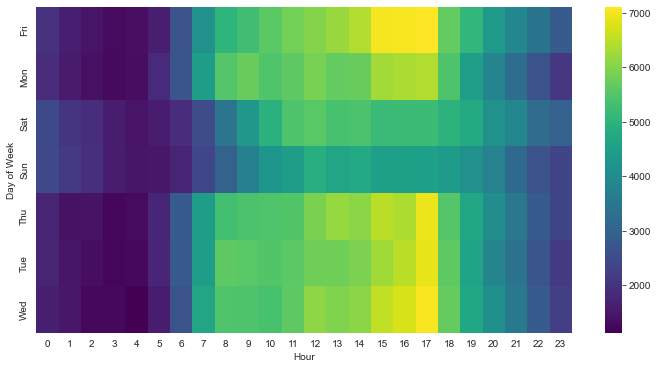

In [67]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

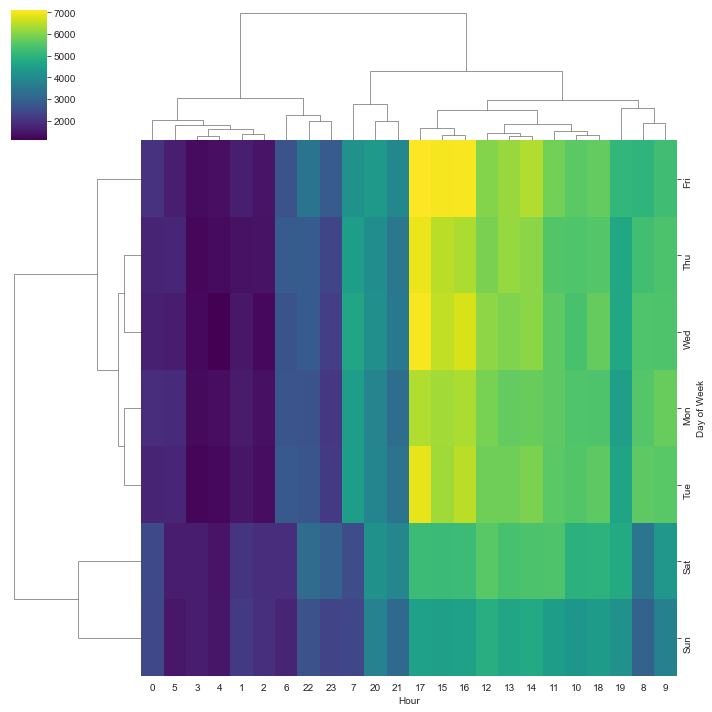

In [51]:
sns.clustermap(dayHour,cmap='viridis')

<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

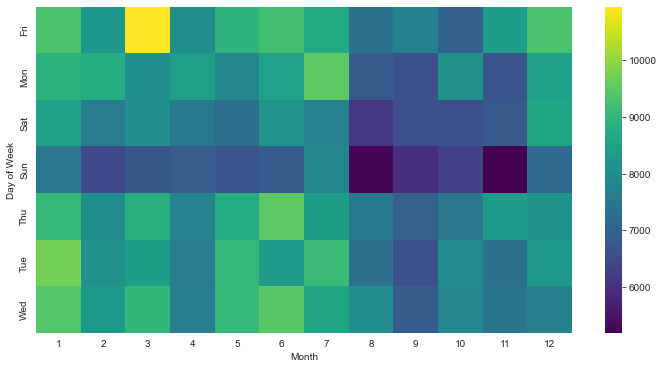

In [68]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

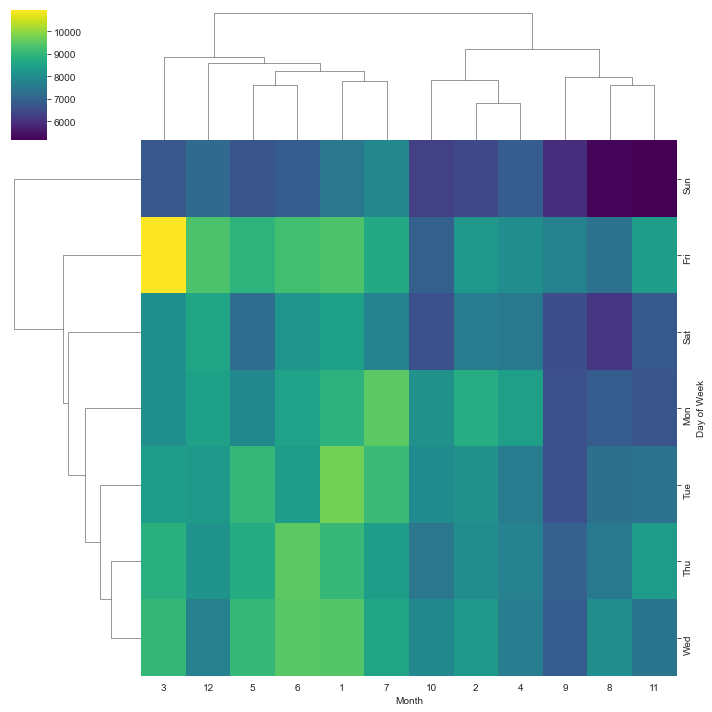

In [54]:
sns.clustermap(dayMonth,cmap='viridis')